In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset:  2017nat_housing_survey1.csv

Source: American Housing Survey by US Census Bureau

https://www.census.gov/programs-surveys/ahs/data/2017/ahs-2017-public-use-file--puf-/2017-ahs-metropolitan-puf-microdata.html


In [2]:
# File to Load 
file_to_load = "dataset/2017nat_housing_survey1.csv"

# Read Purchasing File and store into Pandas data frame
housing_data = pd.read_csv(file_to_load)
housing_data.head(10)

,CONTROL,YRBUILT,UNITSIZE,NHQSCHOOL,TOTROOMS,NHQSCRIME,LOTSIZE,RATINGHS,RATINGNH,PORCH,BATHROOMS,BEDROOMS,BLD,MARKETVAL,OMB13CBSA
0,11000001,2000,6.0,1.0,8,2.0,2.0,10.0,10.0,1,4,3,2,307811.0,37980
1,11000002,1970,8.0,1.0,7,2.0,7.0,10.0,10.0,1,4,3,3,1005540.0,99998
2,11000005,1970,6.0,1.0,8,2.0,5.0,8.0,8.0,1,5,4,2,229992.0,99998
3,11000006,1980,4.0,1.0,5,2.0,3.0,10.0,10.0,1,3,3,2,132220.0,99998
4,11000007,1960,7.0,2.0,8,2.0,2.0,7.0,7.0,1,4,4,2,271584.0,37980
5,11000008,1919,3.0,NaN,5,NaN,NaN,7.0,7.0,2,1,1,9,NaN,99998
6,11000009,1970,5.0,NaN,6,NaN,2.0,NaN,NaN,1,3,3,2,877854.0,99998
7,11000010,1970,3.0,1.0,7,1.0,3.0,8.0,8.0,1,2,3,2,NaN,99998
8,11000012,1960,2.0,1.0,3,1.0,NaN,3.0,2.0,1,1,1,7,NaN,99998
9,11000013,1980,8.0,1.0,8,2.0,3.0,8.0,8.0,1,4,3,2,573123.0,37980


# Cleaning and Preprocessing Data for Machine Learning

In [3]:
# Check for NULL values
housing_data.isnull().sum()

CONTROL          0
YRBUILT          0
UNITSIZE      7857
NHQSCHOOL    14956
TOTROOMS         0
NHQSCRIME    11086
LOTSIZE      21459
RATINGHS     10809
RATINGNH     10889
PORCH            0
BATHROOMS        0
BEDROOMS         0
BLD              0
MARKETVAL    26801
OMB13CBSA        0
dtype: int64

In [4]:
# Ignore rows where there is no market values
housing_data = housing_data.dropna()

In [5]:
# Check again after we drop NULL
housing_data.isnull().sum()

CONTROL      0
YRBUILT      0
UNITSIZE     0
NHQSCHOOL    0
TOTROOMS     0
NHQSCRIME    0
LOTSIZE      0
RATINGHS     0
RATINGNH     0
PORCH        0
BATHROOMS    0
BEDROOMS     0
BLD          0
MARKETVAL    0
OMB13CBSA    0
dtype: int64

In [6]:
housing_df = housing_data.copy()

# MARLETVAL = 999998 is outlier. Let's see how many
housing_df_out = housing_df.loc[housing_df['MARKETVAL'] == 9999998]
len(housing_df_out.index)

14

In [7]:
# Ignore those outliers
housing_df = housing_df.loc[housing_df['MARKETVAL'] != 9999998]

# We will study single family houses only
housing_df = housing_df.loc[housing_df['BLD'] == 2]
housing_df.head()

,CONTROL,YRBUILT,UNITSIZE,NHQSCHOOL,TOTROOMS,NHQSCRIME,LOTSIZE,RATINGHS,RATINGNH,PORCH,BATHROOMS,BEDROOMS,BLD,MARKETVAL,OMB13CBSA
0,11000001,2000,6.0,1.0,8,2.0,2.0,10.0,10.0,1,4,3,2,307811.0,37980
2,11000005,1970,6.0,1.0,8,2.0,5.0,8.0,8.0,1,5,4,2,229992.0,99998
3,11000006,1980,4.0,1.0,5,2.0,3.0,10.0,10.0,1,3,3,2,132220.0,99998
4,11000007,1960,7.0,2.0,8,2.0,2.0,7.0,7.0,1,4,4,2,271584.0,37980
9,11000013,1980,8.0,1.0,8,2.0,3.0,8.0,8.0,1,4,3,2,573123.0,37980


In [8]:
# Phoenix AZ as train data
housing_train_df = housing_df.loc[housing_df['OMB13CBSA'] == 38060]
housing_train_df.head()

,CONTROL,YRBUILT,UNITSIZE,NHQSCHOOL,TOTROOMS,NHQSCRIME,LOTSIZE,RATINGHS,RATINGNH,PORCH,BATHROOMS,BEDROOMS,BLD,MARKETVAL,OMB13CBSA
10410,11013697,1980,6.0,1.0,8,2.0,1.0,8.0,8.0,1,5,5,2,302939.0,38060
10416,11013711,1950,5.0,1.0,5,2.0,2.0,10.0,10.0,1,4,3,2,70762.0,38060
10418,11013715,1990,5.0,2.0,7,1.0,2.0,5.0,5.0,1,4,3,2,239915.0,38060
10419,11013716,1990,6.0,1.0,5,2.0,2.0,8.0,9.0,1,2,3,2,110120.0,38060
10420,11013719,2000,6.0,1.0,7,2.0,3.0,9.0,9.0,1,3,3,2,234026.0,38060


In [9]:
# Find out how many records are in the train data
len(housing_train_df.index)

973

In [10]:
# Build X and y
X = housing_train_df[["TOTROOMS", "YRBUILT", "UNITSIZE"]].values
y = housing_train_df["MARKETVAL"].values
print(X.shape, y.shape)

(973, 3) (973,)


# Data Visualization

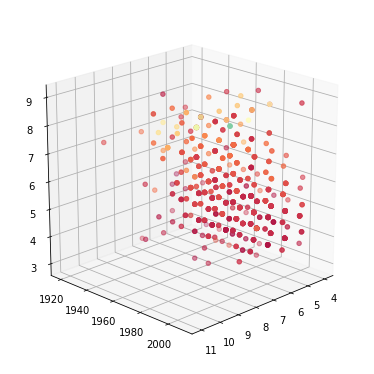

In [11]:
# Let's see what the data looks like

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

## Build model

In [12]:
from sklearn.model_selection import train_test_split

X = housing_train_df[["TOTROOMS", "YRBUILT", "UNITSIZE"]]
y = y.reshape(-1, 1)

In [13]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

score = model.score(X, y)

print('R2: ', score)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 



R2:  0.3529136825384874
Weight coefficients:  [[-1233.43802564  -495.63176954 87607.16166616]]
y-axis intercept:  [806035.17495348]


## Predict

In [14]:
# test data, DFW Texas
housing_test_df = housing_df.loc[housing_df['OMB13CBSA'] == 19100]
housing_test_df.head()

,CONTROL,YRBUILT,UNITSIZE,NHQSCHOOL,TOTROOMS,NHQSCRIME,LOTSIZE,RATINGHS,RATINGNH,PORCH,BATHROOMS,BEDROOMS,BLD,MARKETVAL,OMB13CBSA
11068,11014590,1940,4.0,1.0,5,2.0,3.0,7.0,7.0,2,1,2,2,190639.0,19100
11072,11014595,1970,4.0,1.0,5,2.0,6.0,8.0,8.0,1,3,3,2,374382.0,19100
11073,11014596,1980,5.0,1.0,6,2.0,2.0,8.0,10.0,1,3,3,2,178064.0,19100
11081,11014606,1970,9.0,1.0,9,2.0,5.0,9.0,9.0,1,5,4,2,378147.0,19100
11082,11014607,1950,5.0,1.0,6,2.0,2.0,8.0,5.0,1,3,3,2,58516.0,19100


In [15]:
# Let's see how many rows
len(housing_test_df.index)

1197

In [16]:
# Training and test data have to be the same size. 
housing_test_df = housing_test_df.head(973)

In [17]:
# Build test X, y
X_test = housing_test_df[["TOTROOMS", "YRBUILT", "UNITSIZE"]].values
y_test = housing_test_df["MARKETVAL"].values.reshape(-1,1)
print(X.shape, y.shape)

(973, 3) (973, 1)


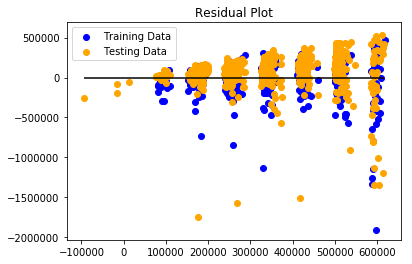

In [18]:
# Build Residual Plot
prediction = model.predict(X_test)
plt.scatter(model.predict(X), model.predict(X) - y, c="blue", label="Training Data")
plt.scatter(prediction, prediction - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=prediction.min(), xmax=prediction.max())
plt.title("Residual Plot")
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error
MSE = mean_squared_error(y_test, prediction)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 41427106006.76206, R2: 0.17030724958773757
